In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [6]:
db.collection_names()
hits = db.hits
ts = db.tasksets

In [8]:
hits = db.hits
list(hits.find({},{'_id':1}))

[{u'_id': ObjectId('55911fb049eb7fef15c0f5c2')},
 {u'_id': ObjectId('55a48ddcc8f17da574db50b7')}]

## Task completion times

Let's compare basic stats for completion times between different conditions.

In [9]:
times = ts.aggregate([
    {'$match':{'user':{'$ne':"Peter"}}},
    {'$unwind':'$tasks'},
    {'$project':{'timeSpent':'$tasks.timeSpent', 'user':1,'hit_id':1}},
])
a = pd.DataFrame(list(times))
a

,_id,hit_id,timeSpent,user
0,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,55a48ddcc8f17da574db50b7,10.769,A38YIGXSBATE66
1,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,55a48ddcc8f17da574db50b7,22.134,A38YIGXSBATE66
2,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,55a48ddcc8f17da574db50b7,16.018,A38YIGXSBATE66
3,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,55a48ddcc8f17da574db50b7,15.310,A38YIGXSBATE66
4,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,55a48ddcc8f17da574db50b7,17.797,A38YIGXSBATE66
5,30BUDKLTXDVIOCN036YEKN7QZPW5EN,55a48ddcc8f17da574db50b7,7.660,A2EAN17FAA9AQF
6,30BUDKLTXDVIOCN036YEKN7QZPW5EN,55a48ddcc8f17da574db50b7,13.400,A2EAN17FAA9AQF
7,30BUDKLTXDVIOCN036YEKN7QZPW5EN,55a48ddcc8f17da574db50b7,12.432,A2EAN17FAA9AQF
8,30BUDKLTXDVIOCN036YEKN7QZPW5EN,55a48ddcc8f17da574db50b7,10.429,A2EAN17FAA9AQF
9,30BUDKLTXDVIOCN036YEKN7QZPW5EN,55a48ddcc8f17da574db50b7,3.470,A2EAN17FAA9AQF


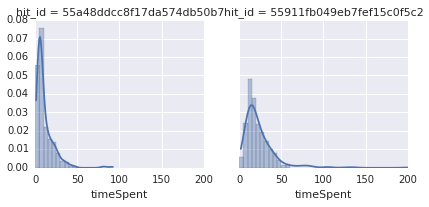

In [10]:
g = sns.FacetGrid(a, col='hit_id', margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(sns.distplot, "timeSpent", bins=bins)

In [11]:
a.groupby('hit_id').mean()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,23.879284
55a48ddcc8f17da574db50b7,11.459299


In [12]:
a.groupby('hit_id').median()

,timeSpent
hit_id,
55911fb049eb7fef15c0f5c2,18.3165
55a48ddcc8f17da574db50b7,6.9390


In [13]:
a.groupby('hit_id').count('timeSpent')

,_id,timeSpent,user
hit_id,,,
55911fb049eb7fef15c0f5c2,500,500,500
55a48ddcc8f17da574db50b7,500,498,500
